# Data Science with Python Pandas

## Exploring Series

In [2]:
# Create a series
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

a   -0.468308
b    0.058556
c   -0.407366
d   -0.580641
e    2.074351
dtype: float64

In [3]:
# Preserve the series in variable s for later access
s = pd.Series(np.random.randn(5))
print(s)

0   -1.248717
1    0.147440
2    1.151380
3   -1.215721
4    0.556176
dtype: float64


In [4]:
# Index
print (s[0])
print("\n")
print (s[:3])

-1.24871729713


0   -1.248717
1    0.147440
2    1.151380
dtype: float64


## Exploring DataFrames

In [5]:
# Create a dataframe
df = pd.DataFrame(s, columns = ['Column 1'])
df

,Column 1
0,-1.248717
1,0.147440
2,1.151380
3,-1.215721
4,0.556176


In [6]:
# Can access columns by name
df['Column 1']

0   -1.248717
1    0.147440
2    1.151380
3   -1.215721
4    0.556176
Name: Column 1, dtype: float64

In [7]:
# Easy to add columns
df['Column 2'] = df['Column 1'] * 4
df

,Column 1,Column 2
0,-1.248717,-4.994869
1,0.147440,0.589762
2,1.151380,4.605521
3,-1.215721,-4.862885
4,0.556176,2.224703


In [8]:
# Other manipulation, like sorting -- if you want to preserve, set equal to a var
df.sort_values(by = 'Column 2')

,Column 1,Column 2
0,-1.248717,-4.994869
3,-1.215721,-4.862885
1,0.147440,0.589762
4,0.556176,2.224703
2,1.151380,4.605521


In [9]:
# Boolean indexing
df[df['Column 2'] <= 2]

,Column 1,Column 2
0,-1.248717,-4.994869
1,0.147440,0.589762
3,-1.215721,-4.862885


In [10]:
df.apply(lambda x: min(x) + max(x))
np.mean(df)

Column 1   -0.121888
Column 2   -0.487554
dtype: float64

In [11]:
table = df.describe()


## Exploring a Dataset

In [12]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [13]:
# Read in data into a dataframe
df = pd.read_csv('GlobalTemperatures.csv')

# Show the first 5 rows of the table
df.tail(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3182,2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061
3183,2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061
3184,2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058
3185,2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057
3186,2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [14]:
# Let's just consider the LandAverageTemperature
# "A primarily label-location based indexer"
df = df.ix[:,:2]
df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [30]:
df.describe()

,LandAverageTemperature
count,3192.000000
mean,8.375063
std,4.377168
min,-2.080000
25%,4.326500
50%,8.599000
75%,12.547000
max,19.021000


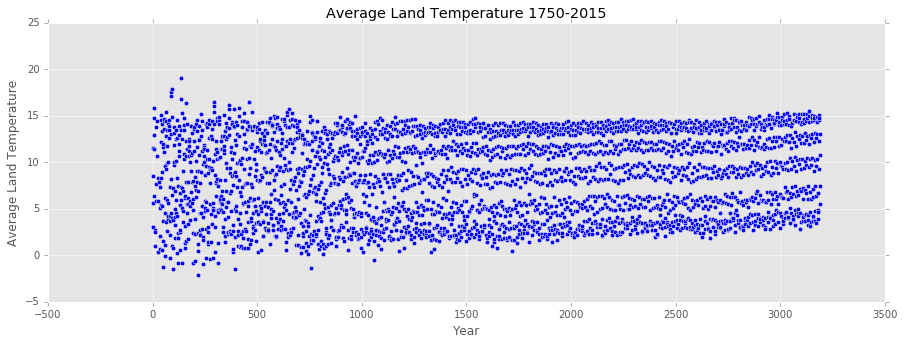

In [16]:
# Cursory plot
plt.figure(figsize = (15, 5))
plt.scatter(x = df['LandAverageTemperature'].index, y = df['LandAverageTemperature'])
plt.title("Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Average Land Temperature")
plt.show()

In [17]:
# Maybe we can try only by year?
# But notice that the dt column is made up of strings
print(type(df['dt'][0]))

<type 'str'>


In [18]:
# Convert to datetime object
times = pd.DatetimeIndex(df['dt'])

# Group by year
grouped = df.groupby([times.year]).mean()

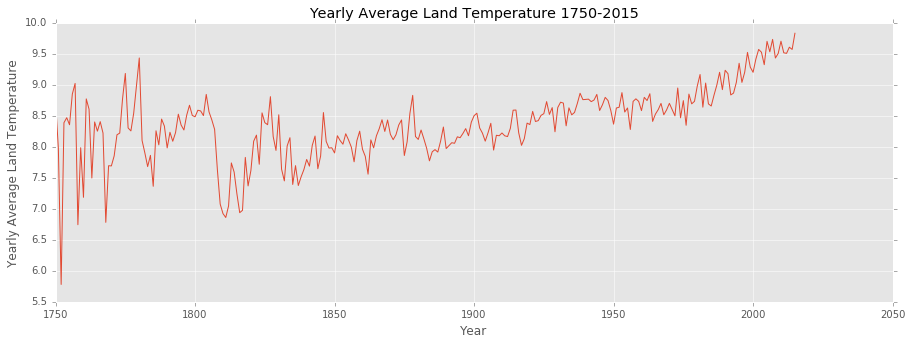

In [19]:
# Plot
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])

# Change features of the graph
plt.title("Yearly Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Yearly Average Land Temperature")
plt.show()

In [20]:
# What caused those anomalies?
grouped.head()

,LandAverageTemperature
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [21]:
# Check what happened in 1752
df[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [22]:
# There are a lot of null values! What else?
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [23]:
# Use previous valid observation to fill gap
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(method='ffill')

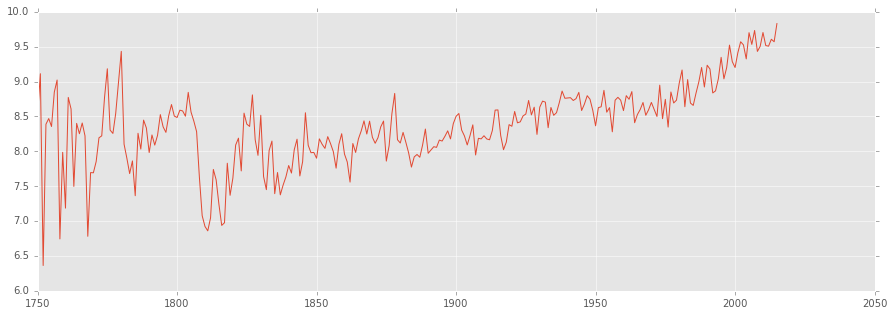

In [24]:
# Regroup and plot
grouped = df.groupby([times.year]).mean()

# Better, but still not perfect
# What are some other ways to fill the NaN values?
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])
plt.show()

## Modeling a Dataset

In [25]:
# Let's model!
from sklearn.linear_model import LinearRegression as LinReg

In [26]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values

In [27]:
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Accuracy: " + str(reg.score(x, y)))

Accuracy: 0.376683227531


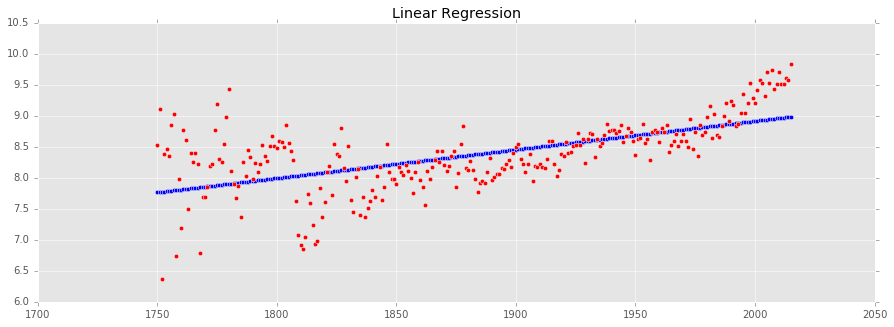

In [28]:
plt.figure(figsize = (15, 5))
plt.title("Linear Regression")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = "r")

In [29]:
reg.predict(2050)

array([ 9.14631486])